# 프로그래머스_순위검색

##### https://school.programmers.co.kr/tryouts/89065/challenges

### 1. 문제 정의

### 1) 언어,직군,경력,소울푸드,점수가 포함된 지원자들의 정보 'info' 리스트가 주어진다.

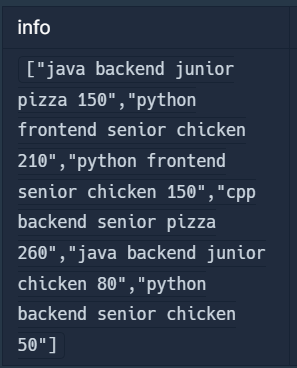 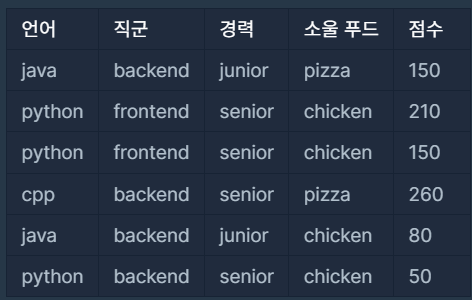  

### 2) 해당 info들을 판별한 여러 문의조건 'query' 리스트가 주어진다.

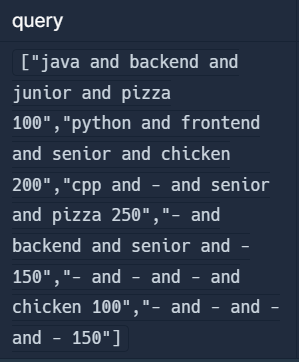 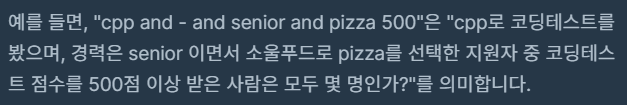

### 3) 이때, 각 query의 조건에 맞는 info수를 각각 구하여라.

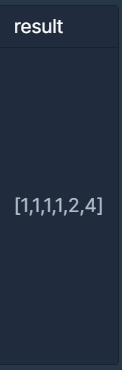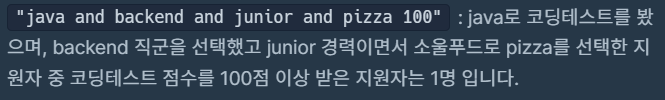

### 2. 풀이 시도

https://velog.io/@min0731/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EC%8A%A4%EC%88%9C%EC%9C%84%EA%B2%80%EC%83%89

### 3. 해답

#### Point : 하나의 info에 대해 동일한 의미의 조건들을 Key로 갖는 Dict 객체 생성

* java,backend,junior,pizza,150 이라는 info가 하나 입력되었을 때

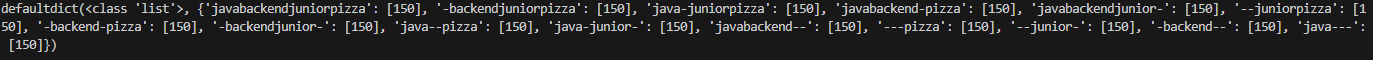

In [1]:
from itertools import combinations
from collections import defaultdict

# 재귀함수를 통한 lower_bound 구현
def lower_bound(begin, end, target_list, target):
    if begin >= end:
        return begin    
    mid = (begin + end) // 2
    if target_list[mid] >= target:
        return lower_bound(begin, mid, target_list, target)
    else:
        return lower_bound(mid+1, end, target_list, target)

def solution(information, queries):
    answer = []
    dic = defaultdict(list)
    for info in information:
        info = info.split()
        
        # 조건
        condition = info[:-1]  
        
        # 점수
        score = int(info[-1])

        # 점수를 제외한 4가지 조건의 경우의 수 key들 생성
        for i in range(5):
            case = list(combinations([0,1,2,3], i))
            for c in case:
                tmp = condition.copy()
                for idx in c:
                    tmp[idx] = "-"
                key = ''.join(tmp)
                dic[key].append(score)

    # 이분 탐색을 위한 정렬
    for value in dic.values():
        value.sort()   

    # 각 query별 이분 탐색
    for query in queries:
        query = query.replace("and ", "")
        query = query.split()
        target_key = ''.join(query[:-1])
        target_score = int(query[-1])
        count = 0
        if target_key in dic:
            target_list = dic[target_key]

            # ~점수 이상의 조건 판별 : lower bound 활용 
            idx = lower_bound(0, len(target_list), target_list, target_score)
            count = len(target_list) - idx

        # query 조건에 맞는 점수(지원자)들 append
        answer.append(count)          
    return answer